# The Neural Dynamics of Valence and Intensity Encoding in the Amygdala and Prefrontal Cortex

**Authors:** Rahim Hashim, Roberto Gulli, Stefano Fusi, Daniel Salzman <br>
**Notebook Owner:** Rahim Hashim (rh2898@columbia.edu) <br>
***

## Import Libraries and Setting Path Variables

Make sure that all the libraries specified in environment.yaml are installed (see [pip](https://packaging.python.org/en/latest/tutorials/installing-packages/) documentation for more info). The structure of the directory should be:
```
ROOT
│
└───data
│   │
│   └─── raw
│   │    │   data_<TASK>
│   └─── processed
│   │    │   data_<TASK>
│   └─── _fractals
│       │   <YYYYMMDD>
│
└─── tasks
    │
    └─── EXPERIMENT
        │   
        └─── <TASK>  
            │   <videos>     

```

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
# Custom classes
from classes.Path import Path
from classes.Session import Session
# pandas options
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)

# Assign paths
ROOT = '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/'
EXPERIMENT = 'rhAirpuff'
TASK = 'Probabilistic_Reward_Airpuff_Choice' # Probabalistic_Airpuff_4x2 | Probabilistic_Reward_Airpuff_5x2 | Probabilistic_Reward_Airpuff_Choice

path_obj = Path(ROOT, EXPERIMENT, TASK)

Raw Data Path Exists: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice
  Number of Files  : 39
  Earliest Date    : 230523
  Most Recent Date : 230712
Video Path Exists: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos
Pulling '.h5' files...
  Complete: 37 '.h5' files pulled


***
## Specifying Session and Analyses Parameters
Choose the date(s) and monkey(s) that you'd like to include in your analysis. 
> `reprocess_data` <br>
> * `True` : generates (or regenerates) the session_df DataFrame from `data/raw` data <br>
> * `False` : loads the pickled session_df DataFrame from the `data/processed` data directory

> `save_df` <br>
> * `True` : pickles the generated session_df DataFrame and saves it in the `data/processed` data directory
> * `False` : does not pickle the session_df DataFrame

> `combine_dates` <br>
> * `True` : runs all analyses on a combined DataFrame and saves figures for all sessions
> * `False` : does not combine analyses and generates new figures for each date

In [2]:
# Custom modules
from config import preprocess_helper

# Specifying date/monkey/task
start_date = '2023-07-12' #@param {type:"date"}
end_date = '2023-07-12' #@param {type:"date"}
monkey_input = 'Bear' #@param ['Aragorn', 'Gandalf', 'Rob', 'Test']
reprocess_data = True #@param {type:"boolean"}
save_df =  True #@param {type:"boolean"}
combine_dates =  True #@param {type:"boolean"}

# Parse data
session_df, session_obj, error_dict, behavioral_code_dict\
	= preprocess_helper.preprocess_data(path_obj,
																			start_date,
																			end_date,
																			monkey_input,
																			TASK,
																			reprocess_data,
																			save_df,
																			combine_dates)

session_df_correct = session_df[session_df['correct'] == 1]

Loading selected file(s):
  230712_Bear_choice.h5 - Completed
Converting .h5 to python:
  <HDF5 file "230712_Bear_choice.h5" (mode r)>
Parsing .h5 file...
Total number of trials: 745
  Choice task detected.
Parsing session data...


  0%|          | 0/745 [00:00<?, ?it/s]

  reward_drops_1 removed from session_dict
    670 trials in field != 745 trials in session
  reward_length_1 removed from session_dict
    670 trials in field != 745 trials in session
  Complete.
    Correct trials: 451
    Errored trials: 294
Parsing camera data...
  Complete.
Creating Session Objects...
  Min Values (X,Y): (-70.702,-45.848)
  Max Values (X,Y): (77.793,113.103)
Adding additional fields to session_df DataFrame...


/Users/rahimhashim/Desktop/Monkey-Behavior/config/add_fields.py:324: RuntimeWarning: Mean of empty slice
  lick_avg = np.nanmean(lick_in_window)


  20 new fields added.
Saving .pickle files to: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/processed/processed_Probabilistic_Reward_Airpuff_Choice
  Pickling 230712_Bear_r1r2_behave.pkl
  Total time to pickle: 0.6443 sec
  Index(['date', 'session_num', 'subject', 'trial_num', 'block', 'condition',
         'correct', 'error', 'error_type', 'behavioral_code_markers',
         'behavioral_code_times', 'stimuli_name_1', 'x_1_pos', 'y_1_pos',
         'stimuli_name_2', 'x_2_pos', 'y_2_pos', 'reward_1', 'reward_prob_1',
         'reward_mag_1', 'reward_2', 'reward_prob_2', 'reward_mag_2',
         'airpuff_1', 'airpuff_prob_1', 'airpuff_mag_1', 'airpuff_2',
         'airpuff_prob_2', 'airpuff_mag_2', 'eye_x', 'eye_y', 'eye_pupil',
         'lick', 'photodiode', 'trial_start', 'trial_datetime_start',
         'trial_datetime_end', 'reinforcement_trial', 'choice_trial',
         'stim_chosen', 'stim_2_chosen', 'fractal_chosen', 'reward',
         'reward_ma

### View DataFrame Headers

Peek into the session_df DataFrame to see the fields included.

In [3]:
pd.set_option('display.max_columns', None)
session_df_correct.head(5)

date  session_num subject  trial_num  block  condition  correct  error   
0  230712            0    Bear          1      1          1        1      0  \
1  230712            0    Bear          2      1          1        1      0   
2  230712            0    Bear          3      1          1        1      0   
4  230712            0    Bear          5      1          1        1      0   
5  230712            0    Bear          6      1          1        1      0   

   error_type                            behavioral_code_markers   
0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 11...  \
1           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 11...   
2           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
4           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
5           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   

                               behavioral_code_times stimuli_name_1 x_1_pos   
0  [2.5095000019064173, 96.78390000772197, 225.65...     _fractal_E   [0.0]  \
1  [1964.7592999972403, 1979.9037000047974, 2050....     _fractal_E   [0.0]   
2  [1965.181699997629, 1986.2425000028452, 2051.7...     _fractal_A   [0.0]   
4  [1966.8873000046005, 1988.4468000091147, 2052....     _fractal_B   [0.0]   
5  [1965.3187999938382, 1973.8045999984024, 2034....     _fractal_A   [0.0]   

  y_1_pos stimuli_name_2 x_2_pos y_2_pos  reward_1  reward_prob_1   
0   [0.0]     _fractal_E   [0.0]   [0.0]         1            1.0  \
1   [0.0]     _fractal_E   [0.0]   [0.0]         1            1.0   
2   [0.0]     _fractal_A   [0.0]   [0.0]         1            1.0   
4   [0.0]     _fractal_B   [0.0]   [0.0]         1            1.0   
5   [0.0]     _fractal_A   [0.0]   [0.0]         1            1.0   

   reward_mag_1  reward_2  reward_prob_2  reward_mag_2  airpuff_1   
0          0.00         0            0.0           0.0          0  \
1          0.00         0            0.0           0.0          0   
2          1.00         0            0.0           0.0          0   
4          0.75         0            0.0           0.0          0   
5          1.00         0            0.0           0.0          0   

   airpuff_prob_1  airpuff_mag_1  airpuff_2  airpuff_prob_2  airpuff_mag_2   
0             0.0            0.0          0             0.0            0.0  \
1             0.0            0.0          0             0.0            0.0   
2             0.0            0.0          0             0.0            0.0   
4             0.0            0.0          0             0.0            0.0   
5             0.0            0.0          0             0.0            0.0   

                                               eye_x   
0  [-10.191038884082179, -10.191038884082179, -10...  \
1  [-3.5785698935394348, -3.5785698935394348, -3....   
2  [2.8069594994489973, 2.797819665818286, 2.7978...   
4  [-14.880863804694794, -14.880863804694794, -14...   
5  [0.9684465845179019, 0.9634724153915265, 0.963...   

                                               eye_y   
0  [-3.6925252564405913, -3.6925252564405913, -3....  \
1  [1.2231165201215437, 1.2231165201215437, 1.223...   
2  [23.256394798298746, 23.255287558005023, 23.25...   
4  [-14.261244880117335, -14.261244880117335, -14...   
5  [7.147492727227407, 7.147154516308521, 7.14715...   

                                           eye_pupil   
0  [7762.0, 7762.0, 7774.0, 7774.0, 7772.0, 7772....  \
1  [6712.0, 6712.0, 6712.0, 6712.0, 6712.0, 6711....   
2  [6557.0, 6557.0, 6557.0, 6564.0, 6564.0, 6576....   
4  [6521.0, 6521.0, 6521.0, 6532.0, 6532.0, 6532....   
5  [6743.0, 6743.0, 6743.0, 6747.0, 6747.0, 6747....   

                                                lick   
0  [4.994568899510253, 4.9889788053910795, 4.9925...  \
1  [0.0046092086426844925, 0.0046092086426844925,...   
2  [0.004280381416606555, 0.005595690320483099, 0...   
4  [4.988321147265397, 4.999830164646849, 4.99522...   
5  [4.9896364635180195, 4.994240070441897, 4.9981...   


***
## Run Analyses

`run_functions` performs all the analyses on session_df.

  perf_by_fractal.png saved.


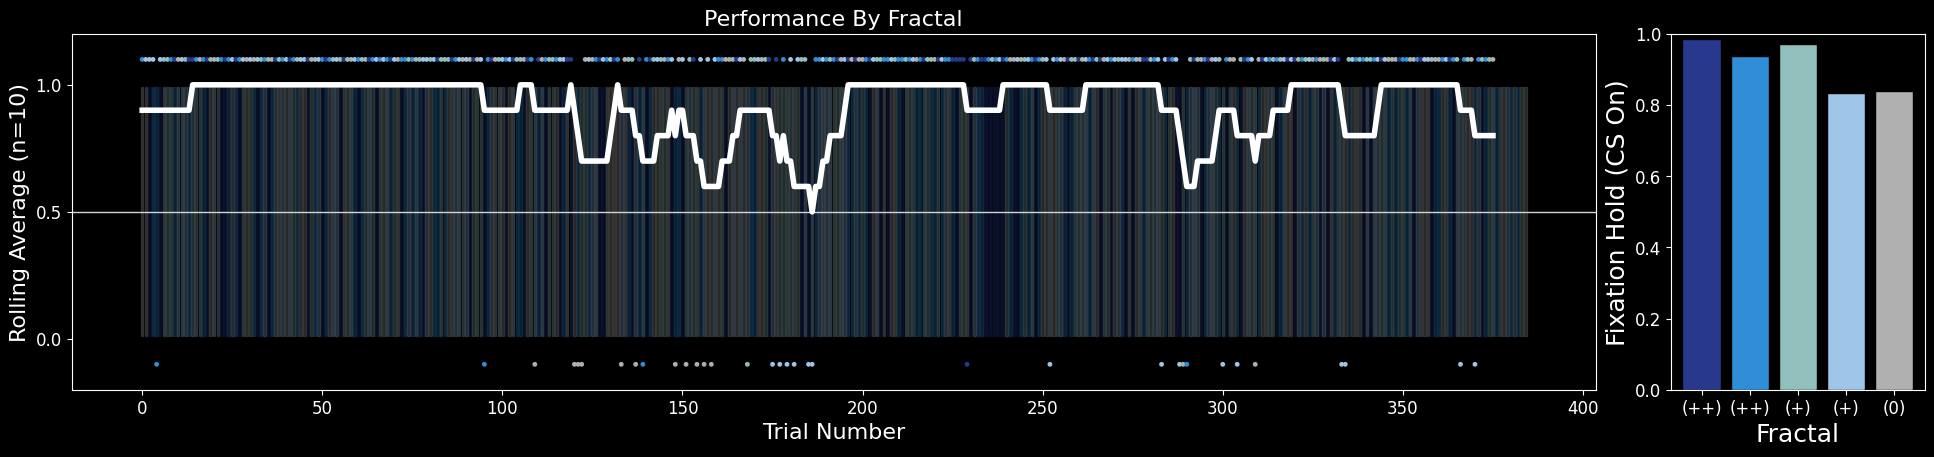

  session_latency.png saved.


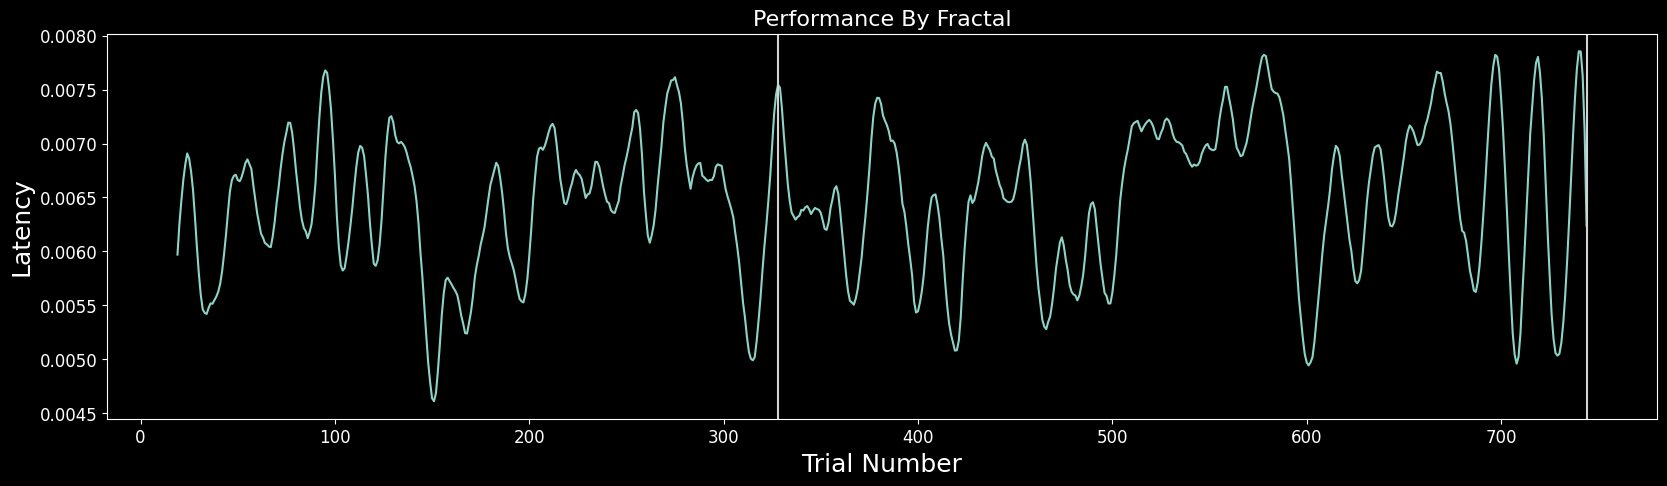

  epoch_hist.png saved.


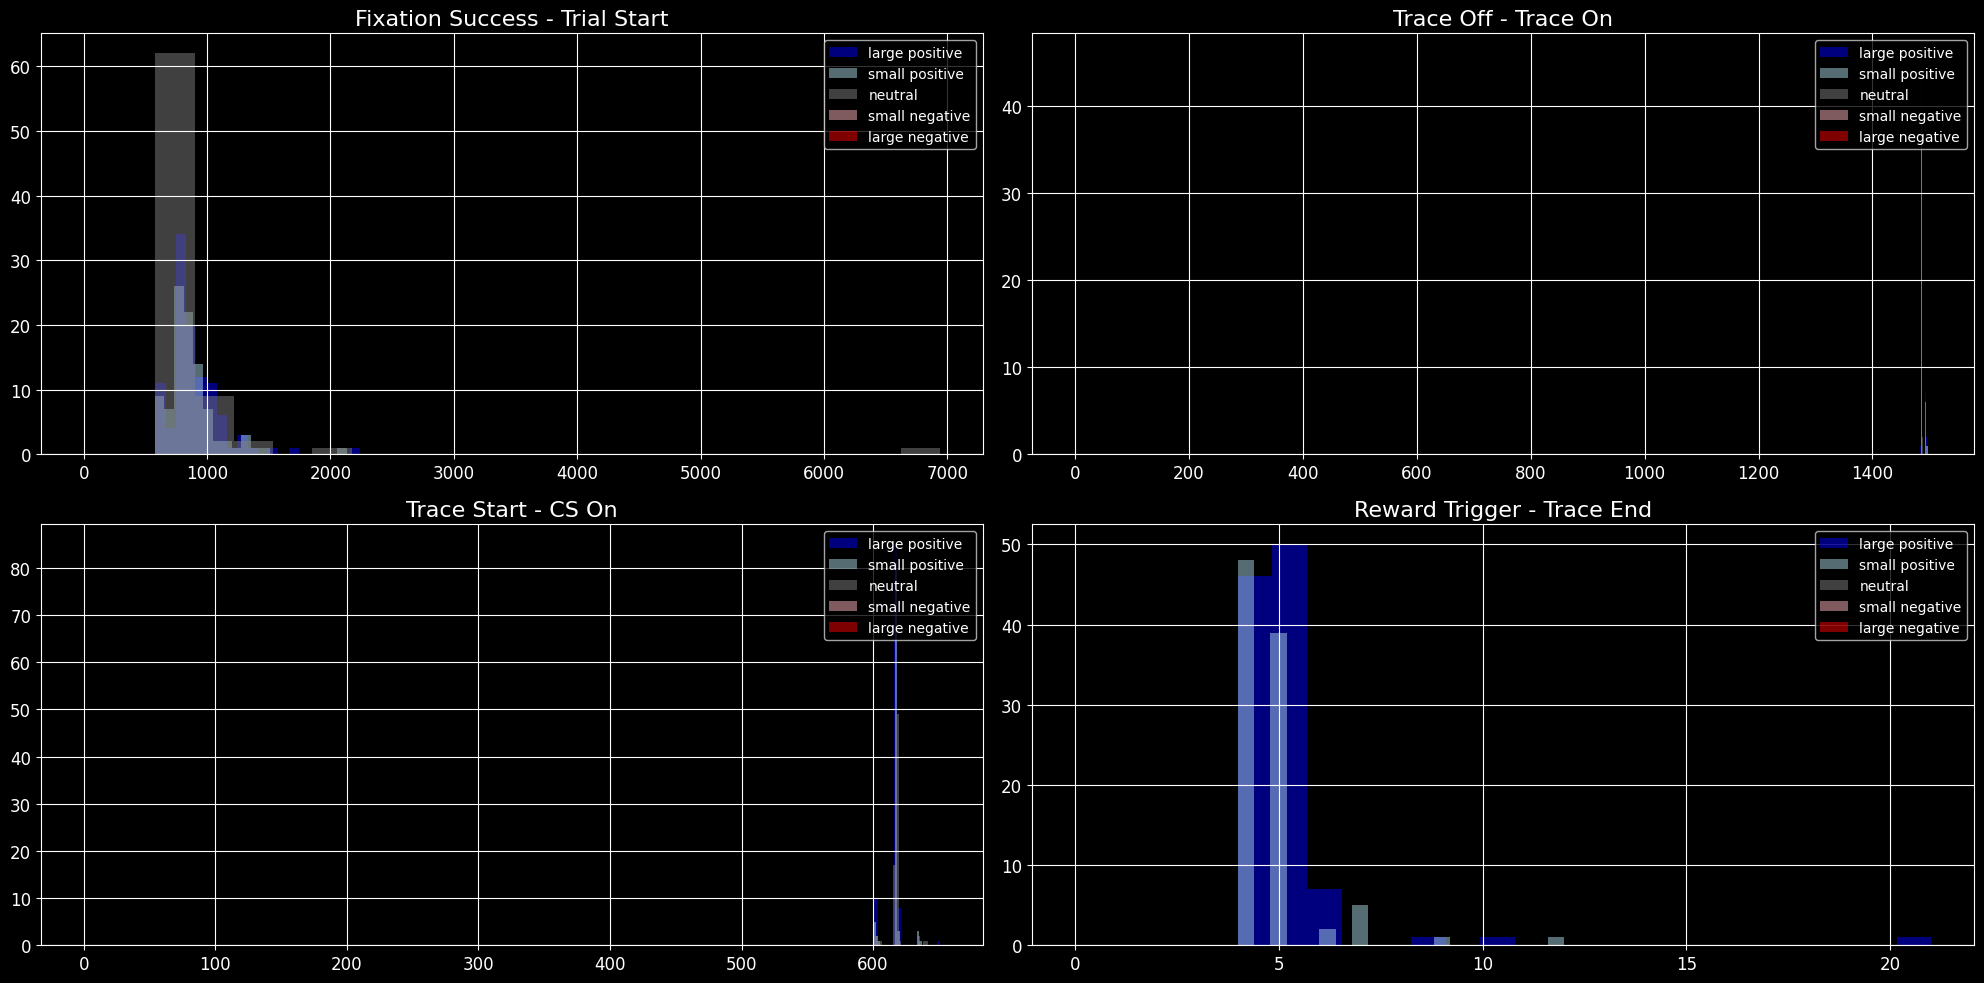

  lick_vs_blink.png saved.
  session_lick_avg.png saved.
  session_blink_avg.png saved.
  fractal_lick_raster.png saved.
  fractal_blink_raster.png saved.
  raster_by_cond_1.png saved.
  t_test_lick-duration_1.png saved.


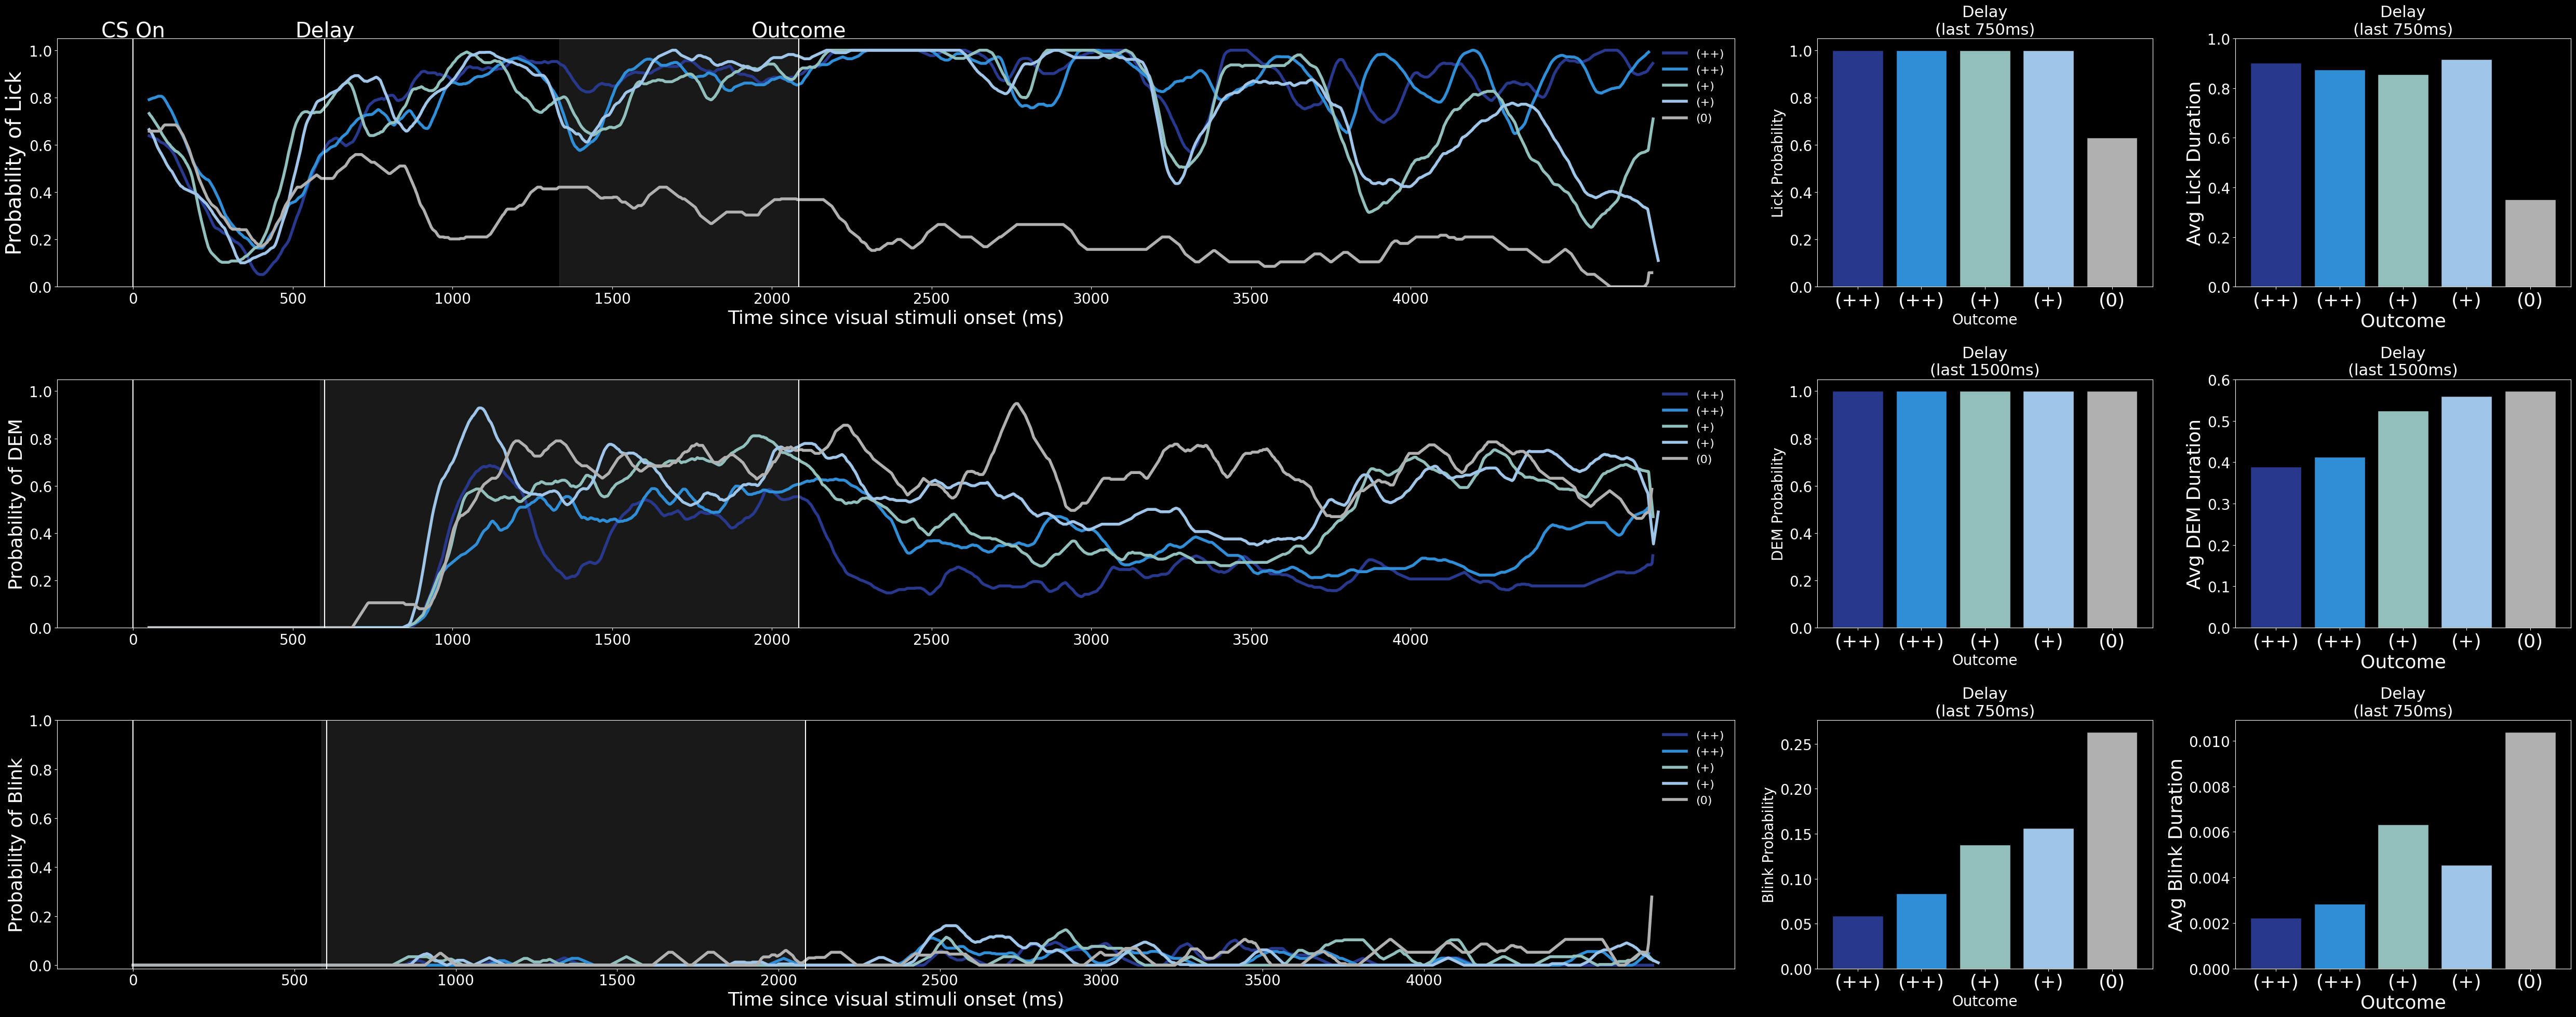

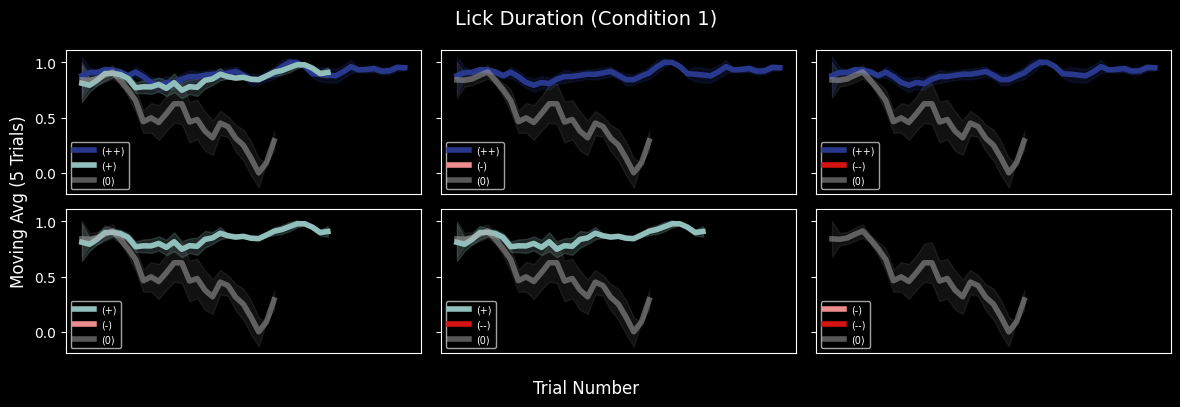

  t_test_DEM-duration_1.png saved.


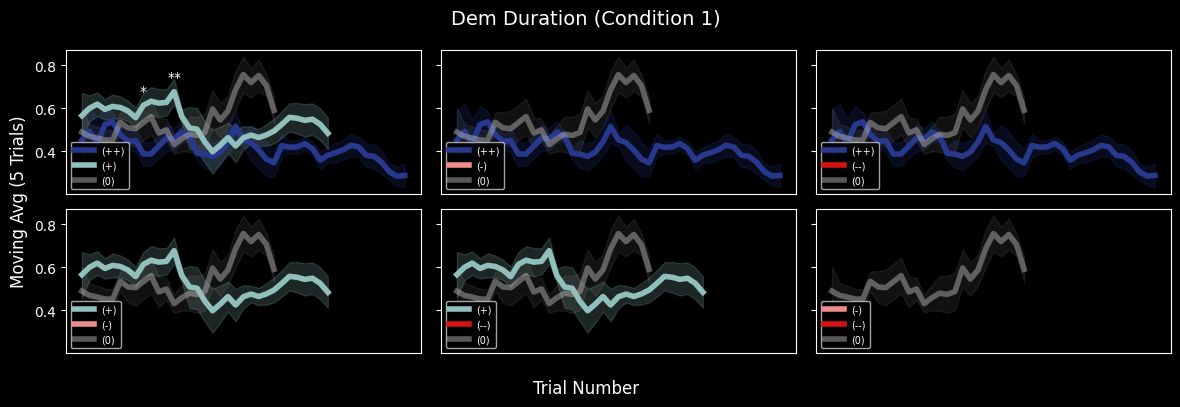

  t_test_blink-duration_1.png saved.


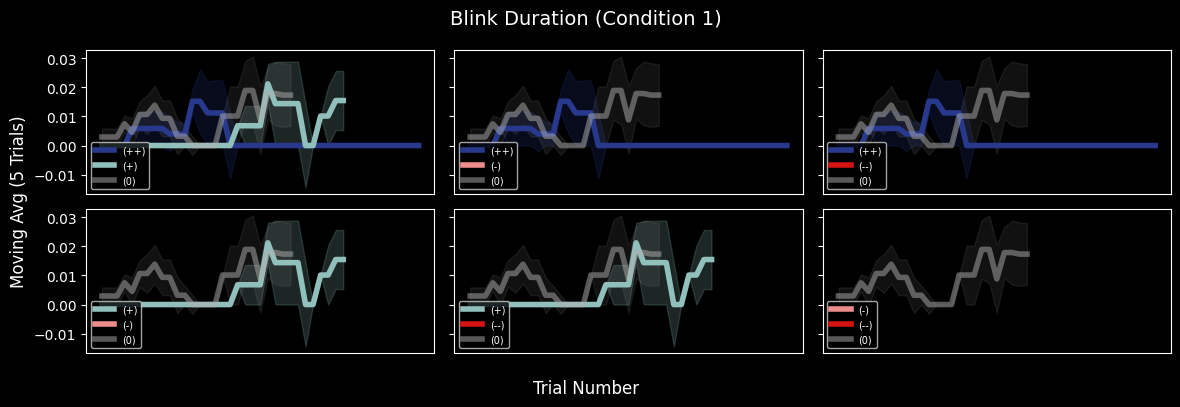

  raster_by_cond_2.png saved.
  t_test_lick-duration_2.png saved.


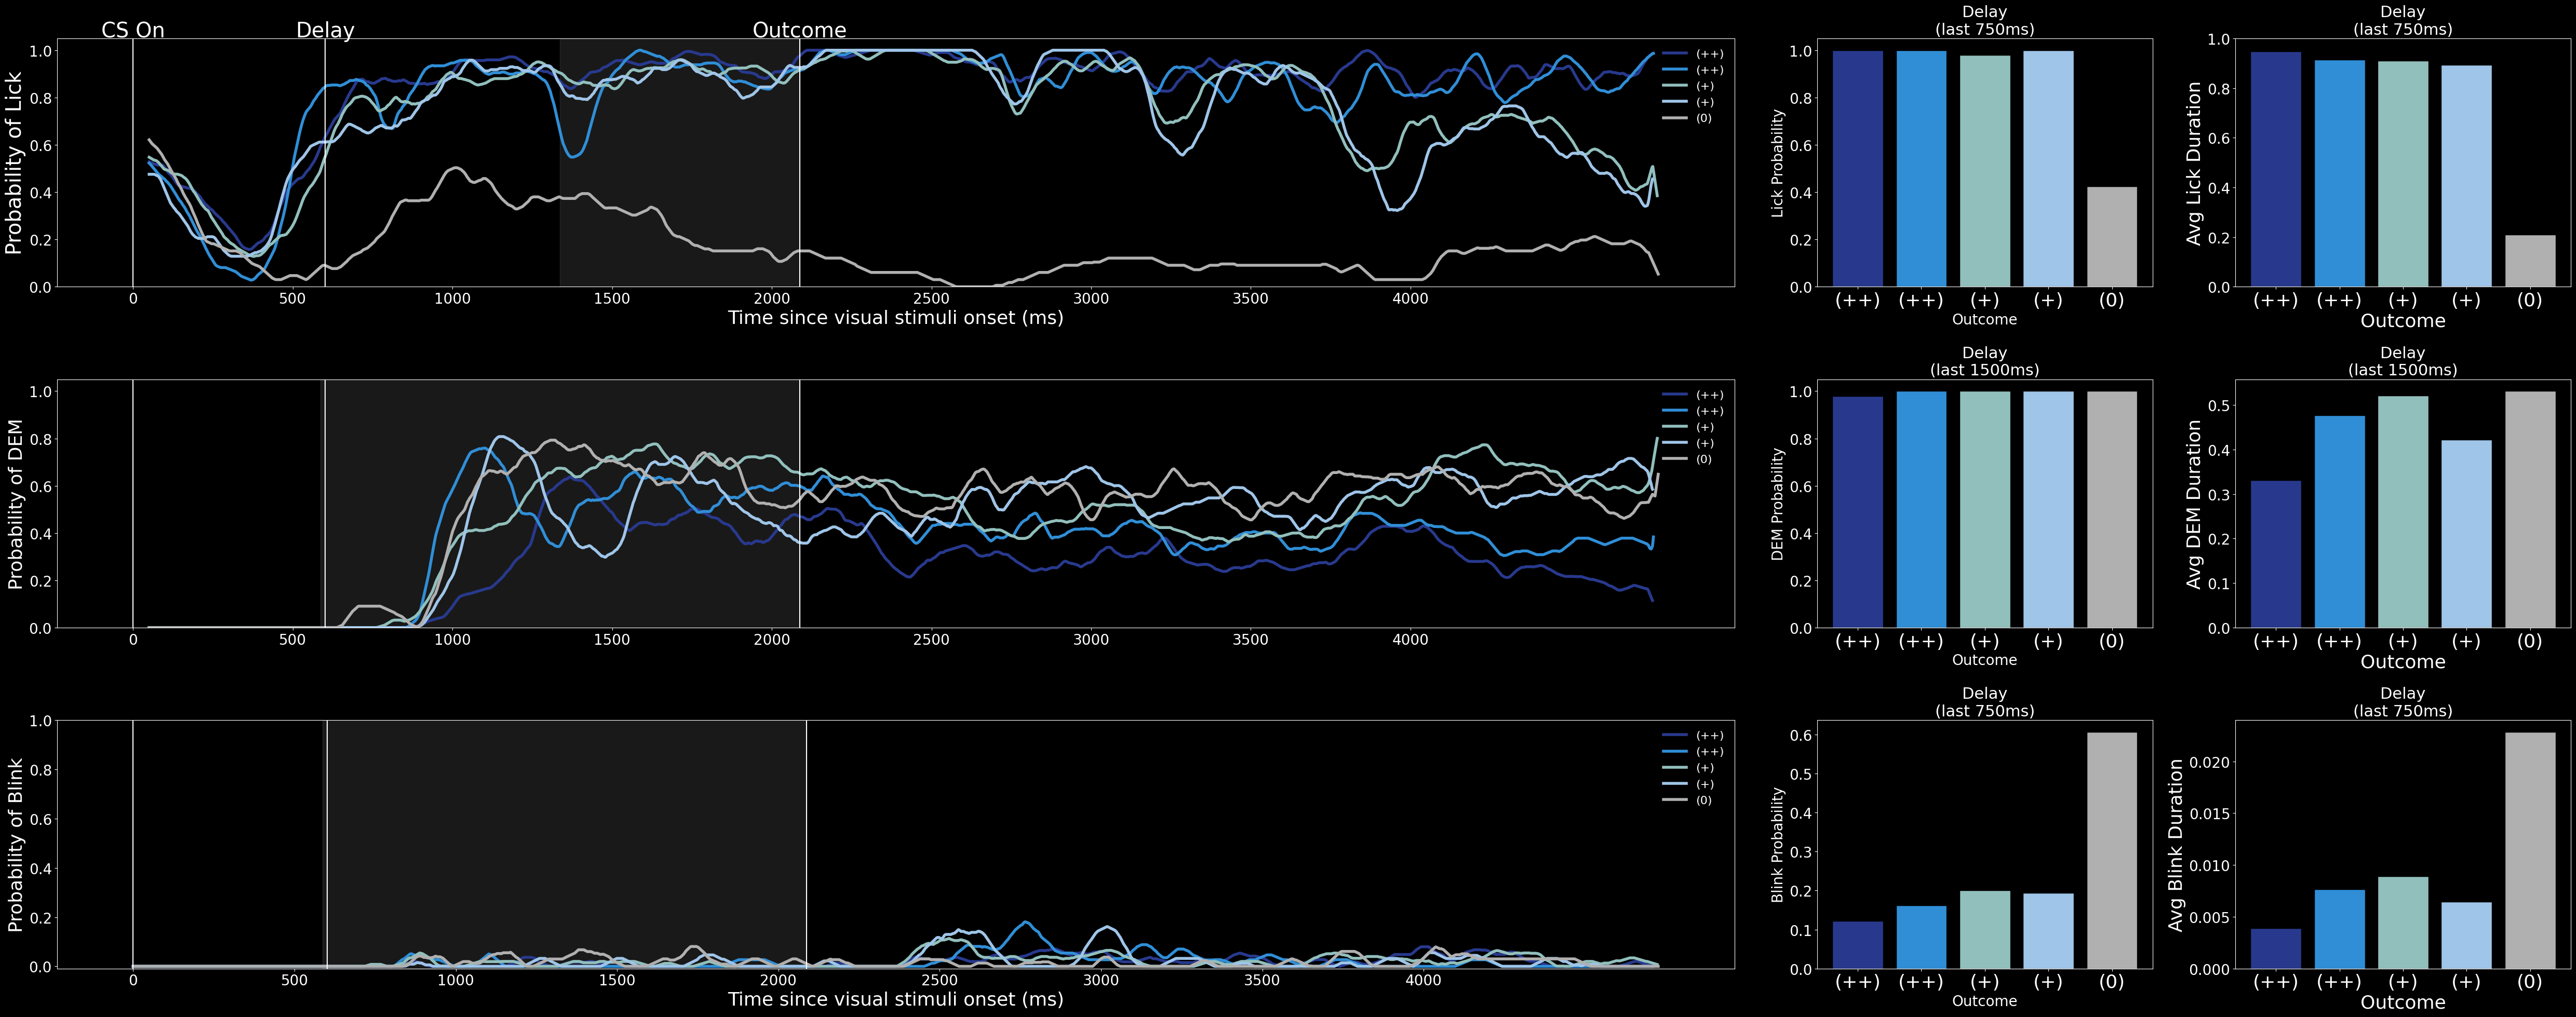

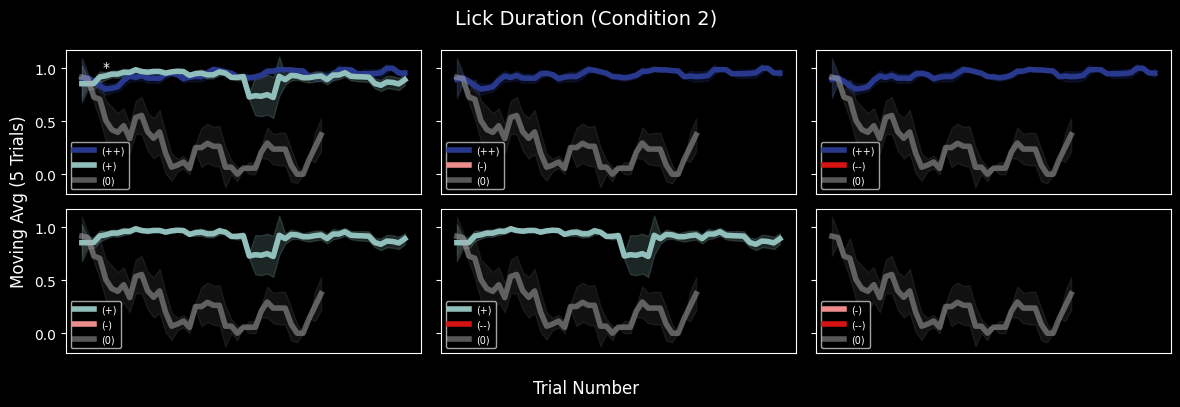

  t_test_DEM-duration_2.png saved.


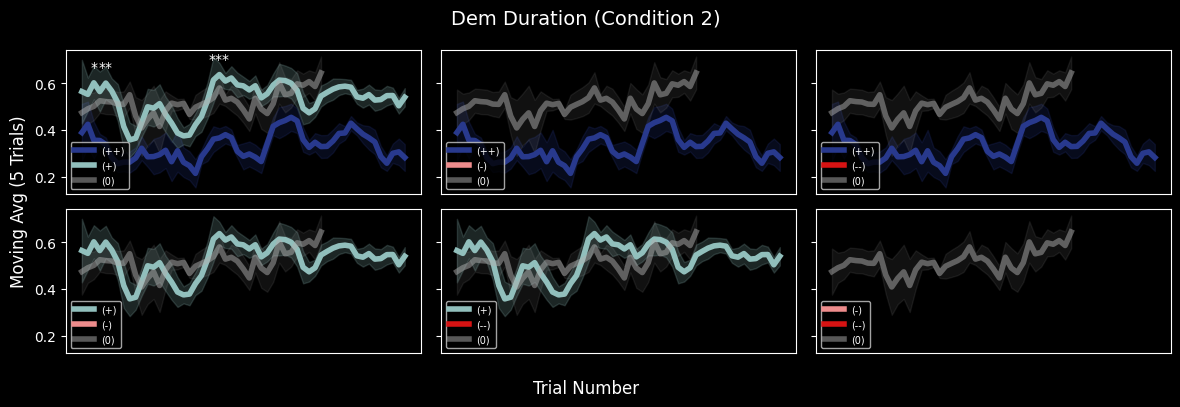

  t_test_blink-duration_2.png saved.


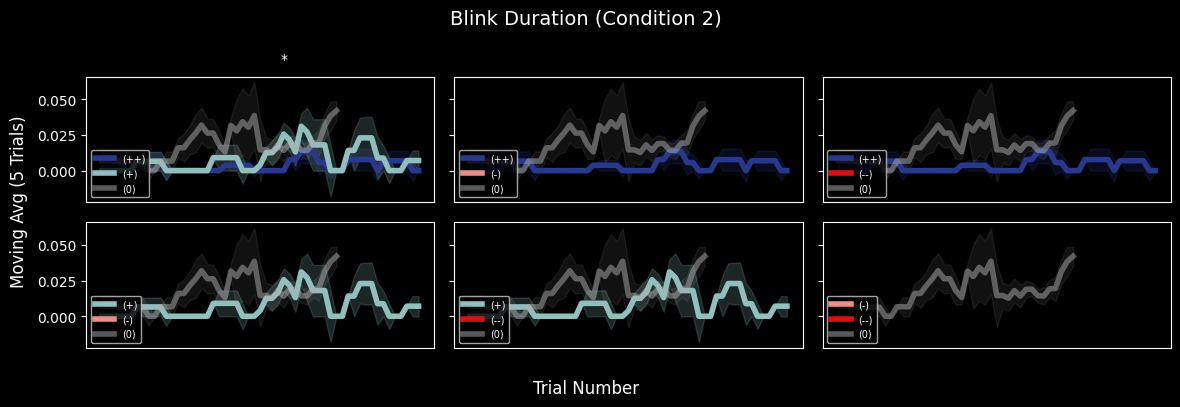

 [0.0, 0.25, 0.5, 0.75, 1.0] ANOVA 135.954 | P-value: 5.31E-61
  (0, 1) T-value: -11.949 P-value: 3.77E-14 |  Z-value: -13.848 P-value: 1.31E-43
    0 Lick Mean: 0.227 Lick Std: 0.309 Trials: 33
    1 Lick Mean: 0.902 Lick Std: 0.096 Trials: 47
  (0, 2) T-value: -11.546 P-value: 2.60E-14 |  Z-value: -13.843 P-value: 1.41E-43
    0 Lick Mean: 0.227 Lick Std: 0.309 Trials: 33
    2 Lick Mean: 0.896 Lick Std: 0.145 Trials: 58
  (0, 3) T-value: -11.771 P-value: 2.44E-14 |  Z-value: -14.194 P-value: 9.91E-46
    0 Lick Mean: 0.227 Lick Std: 0.309 Trials: 33
    3 Lick Mean: 0.903 Lick Std: 0.129 Trials: 56
  (0, 4) T-value: -12.889 P-value: 9.97E-15 |  Z-value: -16.304 P-value: 9.19E-60
    0 Lick Mean: 0.227 Lick Std: 0.309 Trials: 33
    4 Lick Mean: 0.945 Lick Std: 0.078 Trials: 56
  (1, 2) T-value: 0.254 P-value: 8.00E-01 |  Z-value: 0.244 P-value: 8.07E-01
    1 Lick Mean: 0.902 Lick Std: 0.096 Trials: 47
    2 Lick Mean: 0.896 Lick Std: 0.145 Trials: 58
  (1, 3) T-value: -0.018 P-valu

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

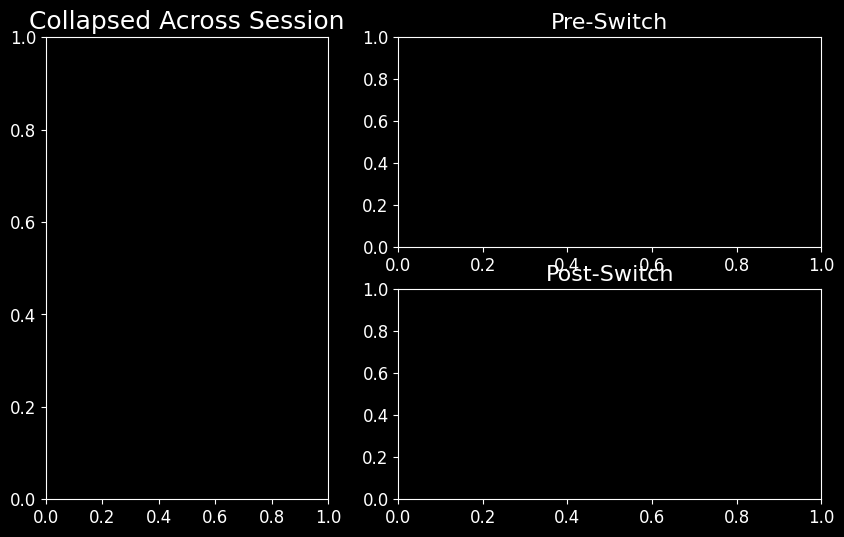

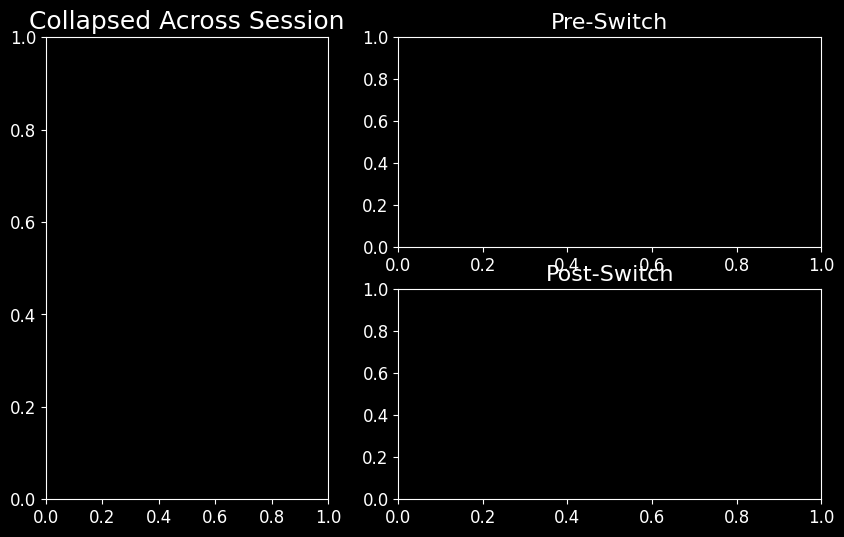

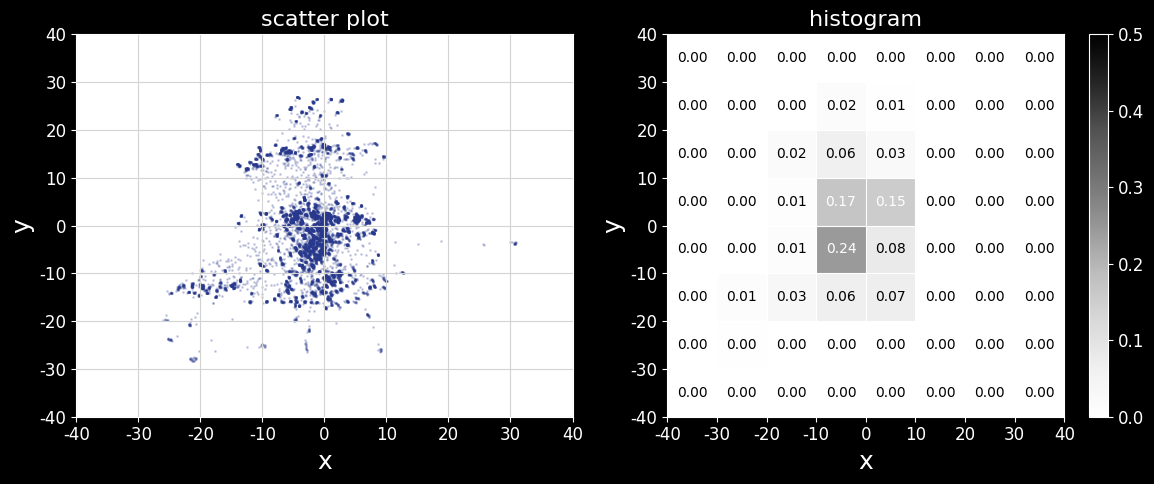

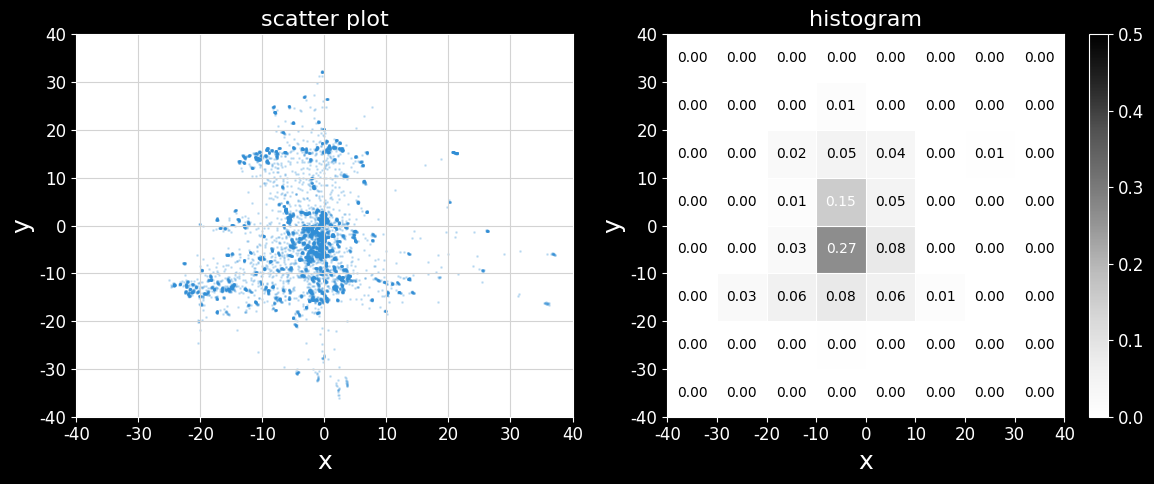

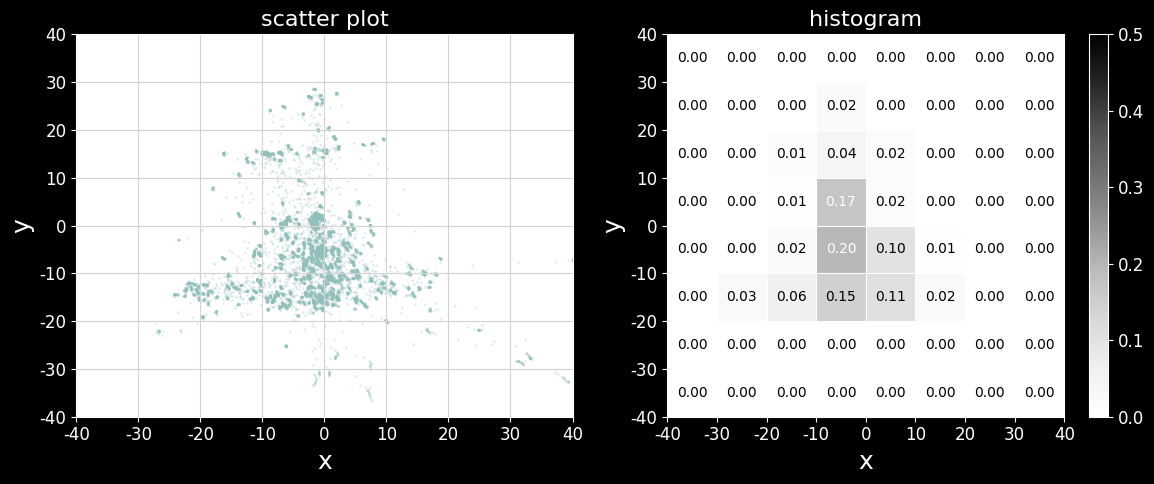

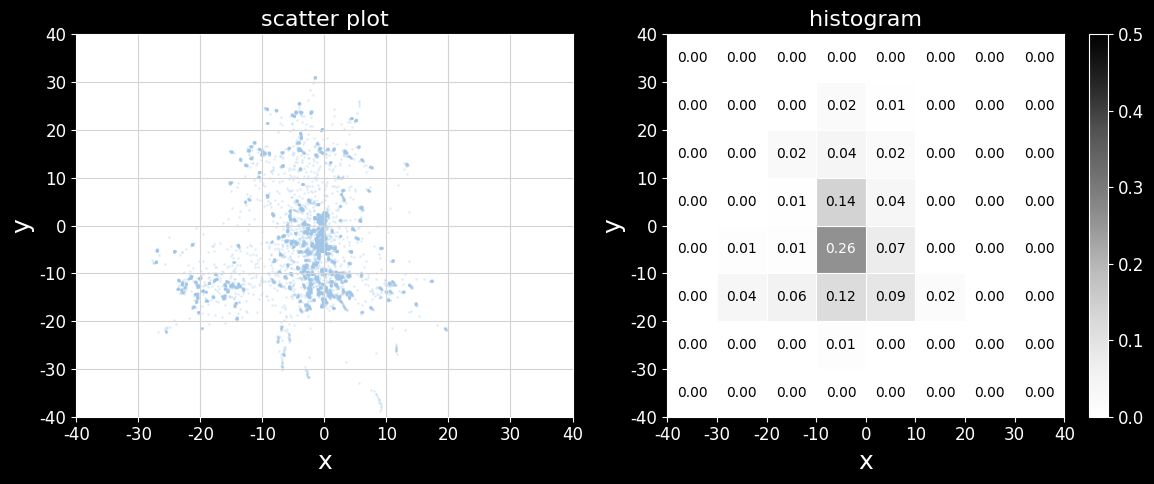

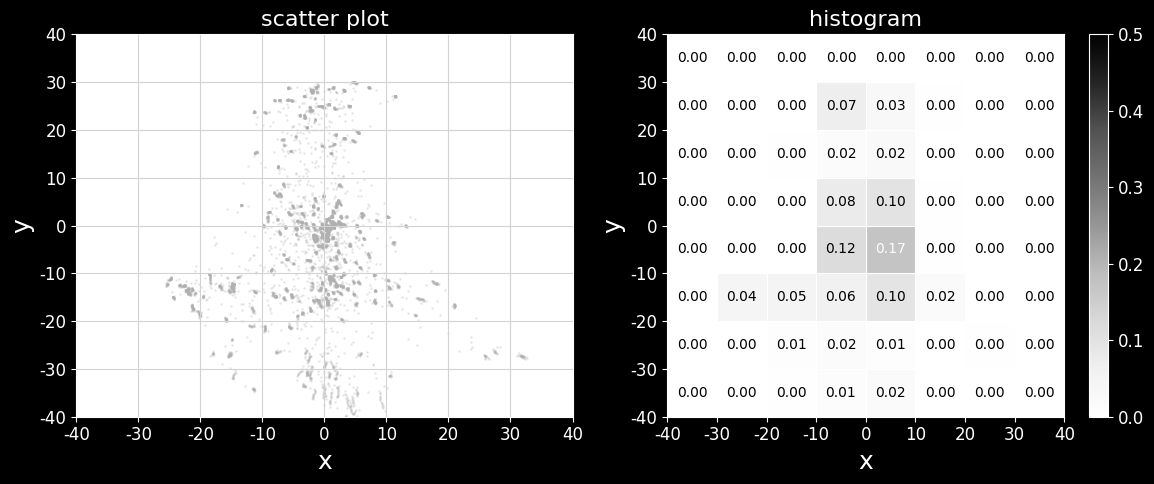

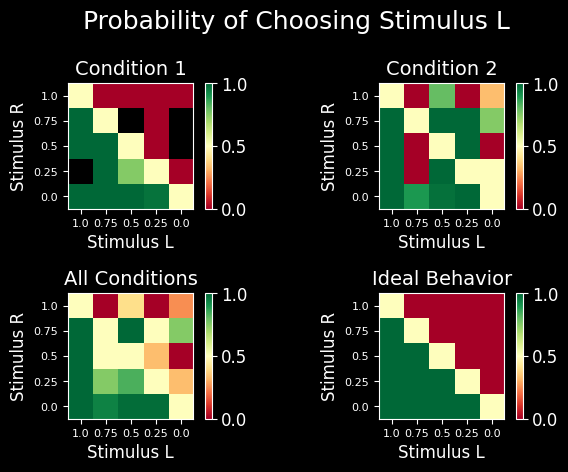

In [30]:
plt.style.use('dark_background')
from analyses.run_functions import run_functions

# dates = [date for date in dates if date not in ['230607', '230609']]
dates = session_df['date'].unique()
for date in dates:
	session_df_date = session_df[session_df['date'] == date]
	session_obj = run_functions(session_df_date, session_obj, path_obj, 
														  behavioral_code_dict, error_dict)

## Reinforcement Trials Only

In [47]:
# CS On is not NaN (otherwise errors not relevant)
session_df_cs_on = session_df[session_df['CS On'].notna()]
# Reinforcement Trials only
session_df_reinforcement = session_df_cs_on[session_df_cs_on['reinforcement_trial'] == 1]
correct_reinforcement_trials = session_df_reinforcement[session_df_reinforcement['correct'] == 1]
# Reinforcement Trial Calculation
print(f'Percent correct reinforcement trials: {round(len(correct_reinforcement_trials)/len(session_df_reinforcement), 3)} ({len(correct_reinforcement_trials)}/{len(session_df_reinforcement)})')

# Valence Calculation
all_valences = sorted(session_df['valence_1'].unique(), reverse=True)
for v_index, valence in enumerate(all_valences):
  # Valence 1 -- due to task code structure but I will fix
  session_df_valence = session_df_reinforcement[session_df_reinforcement['valence_1'] == valence]
  # Filter for correct trials
  session_df_valence_correct = session_df_valence[session_df_valence['correct'] == 1]
  # Calculate percent correct
  percent_correct = round(len(session_df_valence_correct)/len(session_df_valence), 3)
  # Print percent correct by valence
  print(f'  Valence {valence}: {percent_correct} ({len(session_df_valence_correct)}/{len(session_df_valence)})')

session_df_choice = session_df_cs_on[session_df_cs_on['choice_trial'] == 1]
correct_choice_trials = session_df_choice[session_df_choice['correct'] == 1]

# Choice Trial Calculation
print(f'Percent correct choice trials: {round(len(correct_choice_trials)/len(session_df_choice), 3)} ({len(correct_choice_trials)}/{len(session_df_choice)})')


Percent correct reinforcement trials: 0.918 (190/207)
  Valence 1.0: 0.939 (46/49)
  Valence 0.5: 0.941 (48/51)
  Valence -0.5: 0.865 (45/52)
  Valence -1.0: 0.927 (51/55)
Percent correct choice trials: 0.587 (74/126)


## Comparing Reinforcement and Choice Trial Performance

In [48]:
session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
session_df_reinforcement.groupby(['valence'])\
              [['lick_duration',
                'blink_duration_offscreen',
                'pupil_raster_window_avg',
                'blink_duration_window',
                'eye_distance']].mean()

lick_duration  blink_duration_offscreen  pupil_raster_window_avg   
valence                                                                     
-1.0          0.554248                  0.451216                 0.081869  \
-0.5          0.552533                  0.548919                 0.033659   
 0.5          0.845917                  0.314528                 0.043458   
 1.0          0.860609                  0.383870                 0.017986   

         blink_duration_window  eye_distance  
valence                                       
-1.0                  0.126810     84.751131  
-0.5                  0.061896     78.468890  
 0.5                  0.066153     65.645012  
 1.0                  0.043768     65.800591

In [49]:
session_df_reinforcement.groupby(['condition', 'fractal_chosen'])\
              [['valence', 'lick_duration',
                'blink_duration_offscreen',
                'pupil_raster_window_avg',
                'blink_duration_window',
                'eye_distance']].mean()

valence  lick_duration  blink_duration_offscreen   
condition fractal_chosen                                                     
1         _fractal_A          1.0       0.865720                  0.371548  \
          _fractal_B          0.5       0.847778                  0.293241   
          _fractal_D         -0.5       0.550057                  0.530724   
          _fractal_E         -1.0       0.523740                  0.495122   
2         _fractal_A         -0.5       0.561200                  0.612600   
          _fractal_B         -1.0       0.679333                  0.271200   
          _fractal_D          1.0       0.850044                  0.409333   
          _fractal_E          0.5       0.840333                  0.378389   

                          pupil_raster_window_avg  blink_duration_window   
condition fractal_chosen                                                   
1         _fractal_A                     0.007978               0.022903  \
          _fractal_B                     0.029704               0.049204   
          _fractal_D                     0.032000               0.056019   
          _fractal_E                     0.076764               0.118976   
2         _fractal_A                     0.039467               0.082467   
          _fractal_B                     0.102800               0.158933   
          _fractal_D                     0.038667               0.086889   
          _fractal_E                     0.084722               0.117000   

                          eye_distance  
condition fractal_chosen                
1         _fractal_A         65.363979  
          _fractal_B         65.779568  
          _fractal_D         75.664492  
          _fractal_E         91.084174  
2         _fractal_A         88.284281  
          _fractal_B         58.785653  
          _fractal_D         66.702922  
          _fractal_E         65.241345

In [ ]:
def trialno_lick_blink_correlation(df, session_obj):
  f, ax = plt.subplots(1, 1, figsize=(5, 5))
  df_threshold = df[df['fractal_count_in_block'] > 10]
  for block in df_threshold['condition'].unique():
    df_block = df_threshold[df_threshold['condition'] == block]
    print(f'Block: {block}')
    for valence in sorted(df_block['valence'].unique(), reverse=True):
      df_block_valence = df_block[df_block['valence'] == valence]
      trialno_lick_corr = round(df_block_valence['fractal_count_in_block'].corr(df_block_valence['lick_duration']), 3)
      trial_no_blink_corr = round(df_block_valence['fractal_count_in_block'].corr(df_block_valence['blink_duration_window']), 3)
      print(f'  Valence {valence}: Lick Correlation: {trialno_lick_corr} | Blink Correlation: {trial_no_blink_corr}')
      ec = 'black' if block == 1 else 'white'
      ax.scatter(trialno_lick_corr, trial_no_blink_corr, s=150,
                label=None, 
                color=session_obj.valence_colors[valence], ec=ec)
      ax.set_xlabel('Trial Number vs. Lick Duration Correlation', fontsize=14)
      ax.set_ylabel('Trial Number vs. Blink Duration Correlation', fontsize=14)
  ax.set_xlim(-0.5, 0.5)
  ax.set_ylim(-0.5, 0.5)
  plt.show()
    
trialno_lick_blink_correlation(session_df_correct, session_obj)

In [ ]:
plt.style.use('dark_background')
blink_trials = session_df_correct[session_df_correct['pupil_binary_zero'] == 1].index.tolist()

In [ ]:
from distance_analysis import calc_eye_dist
blink_bin_threshold = 20
session_df_correct = \
	session_df_correct.apply(calc_eye_dist, session_obj=session_obj, blink_bin_threshold=blink_bin_threshold, axis=1)


In [ ]:
from distance_analysis import plot_eye_dist_histogram
plot_eye_dist_histogram(session_df_correct)

In [ ]:
from pupil_analysis import pupil_valence_no_blink, pupil_preblink
pupil_valence_no_blink(session_df_correct, session_obj)
pupil_preblink(session_df_correct, session_obj)

In [ ]:
session_df_correct['Fixation Duration'] = session_df_correct['Fixation Success'] - session_df_correct['Fixation On']
session_df_correct['CS Duration'] = session_df_correct['CS Off'] - session_df_correct['CS On']
session_df_correct['Trace Duration'] = session_df_correct['Trace End'] - session_df_correct['Trace Start']
session_df_correct['Outcome Duration'] = session_df_correct['Outcome End'] - session_df_correct['Outcome Start']
session_df_correct['Trial Duration'] = session_df_correct['End Trial'] - session_df_correct['Fixation Success']

In [ ]:
session_df_positive = session_df_correct[session_df_correct['valence'] == 1]
session_df_positive['Trace_to_Outcome'] = session_df_positive['Reward Trigger'] - session_df_positive['Outcome Start']
session_df_positive[['valence', 'Fixation Duration', 'CS Duration', 'Trace Duration', 'Trace_to_Outcome', 'Outcome Duration', 'Trial Duration']].mean()

In [ ]:
session_df_positive = session_df_correct[session_df_correct['valence'] == 0.5]
session_df_positive['Trace_to_Outcome'] = session_df_positive['Reward Trigger'] - session_df_positive['Outcome Start']
session_df_positive[['valence', 'Fixation Duration', 'CS Duration', 'Trace Duration', 'Trace_to_Outcome', 'Outcome Duration', 'Trial Duration']].mean()

In [ ]:
session_df_negative = session_df_correct[session_df_correct['valence'] == -0.5]
session_df_negative['Trace_to_Outcome'] = session_df_negative['Airpuff Trigger'] - session_df_negative['Outcome Start']
session_df_negative[['valence', 'Fixation Duration', 'CS Duration', 'Trace Duration', 'Trace_to_Outcome', 'Outcome Duration', 'Trial Duration']].mean()

In [ ]:
session_df_negative = session_df_correct[session_df_correct['valence'] == -1]
session_df_negative['Trace_to_Outcome'] = session_df_negative['Airpuff Trigger'] - session_df_negative['Outcome Start']
session_df_negative[['valence', 'Fixation Duration', 'CS Duration', 'Trace Duration', 'Trace_to_Outcome', 'Outcome Duration', 'Trial Duration']].mean()

***
## Exploratory Analysis
### High Lick + Low DEM/Blink Trials

In [78]:
session_df_correct.loc[(session_df_correct['blink_in_window'] == 0) & 
											 (session_df_correct['eye_distance'] < 20) &
											 (session_df_correct['lick_duration'] > 0.75)]

date  session_num  subject  trial_num  block  condition  correct   
69   230530            0  Aragorn         70      1          1        1  \
95   230530            0  Aragorn         96      1          1        1   
100  230530            0  Aragorn        101      1          1        1   
124  230530            0  Aragorn        125      1          1        1   
183  230530            0  Aragorn        184      1          1        1   
195  230530            0  Aragorn        196      1          1        1   
206  230530            0  Aragorn        207      1          1        1   
218  230530            0  Aragorn        219      1          1        1   
254  230530            0  Aragorn        255      1          1        1   
275  230530            0  Aragorn        276      1          1        1   
289  230530            0  Aragorn        290      1          1        1   
290  230530            0  Aragorn        291      1          1        1   
291  230530            0  Aragorn        292      1          1        1   
372  230530            0  Aragorn        373      1          1        1   
373  230530            0  Aragorn        374      2          2        1   
378  230530            0  Aragorn        379      2          2        1   
379  230530            0  Aragorn        380      2          2        1   
413  230530            0  Aragorn        414      2          2        1   
422  230530            0  Aragorn        423      2          2        1   
439  230530            0  Aragorn        440      2          2        1   
444  230530            0  Aragorn        445      2          2        1   
527  230530            0  Aragorn        528      2          2        1   
552  230530            0  Aragorn        553      2          2        1   
634  230530            0  Aragorn        635      2          2        1   
741  230530            0  Aragorn        742      2          2        1   
789  230530            0  Aragorn        790      2          2        1   
809  230530            0  Aragorn        810      2          2        1   
814  230530            0  Aragorn        815      2          2        1   
842  230530            0  Aragorn        843      2          2        1   
854  230530            0  Aragorn        855      2          2        1   
859  230530            0  Aragorn        860      2          2        1   

     error  error_type                            behavioral_code_markers   
69       0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...  \
95       0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
100      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
124      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
183      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
195      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
206      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
218      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
254      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
275      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
289      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
290      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
291      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
372      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
373      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
378      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
379      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
413      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
422      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
439      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107

### High DEM + Blink + Eye Movement / Low Lick Trials

In [42]:
session_df_correct.loc[(pd.isna(session_df_correct['Manual Reward']) == True) &
											 (session_df_correct['pupil_raster_window_avg'] > 0.2) &
											 (session_df_correct['blink_duration_offscreen'] > 0.30) &
											 (session_df_correct['eye_distance'] > 10) & 
											 (session_df_correct['lick_duration'] < 0.25)]

date  session_num  subject  trial_num  block  condition  correct   
104  230602            1  Aragorn        105      1          1        1  \
141  230602            1  Aragorn        142      1          1        1   
196  230602            1  Aragorn        197      1          1        1   
209  230602            1  Aragorn        210      1          1        1   
229  230602            1  Aragorn        230      1          1        1   
236  230602            1  Aragorn        237      1          1        1   
321  230602            1  Aragorn        322      2          2        1   
329  230602            1  Aragorn        330      2          2        1   
340  230602            1  Aragorn        341      2          2        1   
353  230602            1  Aragorn        354      2          2        1   
363  230602            1  Aragorn        364      2          2        1   
379  230602            1  Aragorn        380      2          2        1   
406  230602            1  Aragorn        407      2          2        1   
423  230602            1  Aragorn        424      2          2        1   
471  230602            1  Aragorn        472      2          2        1   
491  230602            1  Aragorn        492      2          2        1   
493  230602            1  Aragorn        494      2          2        1   
501  230602            1  Aragorn        502      2          2        1   

     error  error_type                            behavioral_code_markers   
104      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...  \
141      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
196      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
209      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
229      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 11...   
236      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
321      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 11...   
329      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
340      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
353      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
363      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
379      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
406      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
423      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
471      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 11...   
491      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
493      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
501      0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 11...   

                                 behavioral_code_times stimuli_name_1 x_1_pos   
104  [1999.5990000024904, 2005.1457000081427, 2068....     _fractal_C  [-5.0]  \
141  [1966.2262000201736, 1972.4291000165977, 2036....     _fractal_D   [0.0]   
196  [1965.9737999900244, 1980.8899000054225, 2053....     _fractal_D   [0.0]   
209  [1966.092499991646, 1972.5158000073861, 2036.5...     _fractal_E   [0.0]   
229  [1965.9534000093117, 1973.1468000099994, 2036....     _fractal_C   [0.0]   
236  [1965.6775000039488, 1971.1595000117086, 2036....     _fractal_E   [0.0]   
321  [1966.1993000190705, 1972.517100017285, 2036.6...     _fractal_C   [0.0]   
329  [1966.1643999861553, 1977.9292999883182, 2036....     _fractal_B   [0.0]   
340  [1965.7595999888144, 1981.3708000001498, 2053....     _fractal_C  [-5.0]   
353  [1965.5705000041053, 1972.1156999876257, 2036....     _fractal_B   [0.0]   
363  [2366.524200013373, 2373.5235999920405, 2437.1...     _fractal_C  [-5.0]   
379  [1965.8149000024423, 1972.5328999920748, 2036....     _fractal_A   [0.0]   
406  [1999.1103999782354, 2006.9111000047997, 2067....     _frac

In [ ]:
# get correlation between two columns 'pupil_raster_window_avg' and 'blink_duration'
print('Lick vs. DEM Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_offscreen']), 3))
print('Lick vs. Blink Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_window']), 3))
print('DEM vs. Blink Correlation', round(session_df_correct['blink_duration_offscreen'].corr(session_df_correct['blink_duration_window']), 3))
print('Pupil 0 vs. Blink Correlation', round(session_df_correct['pupil_raster_window_avg'].corr(session_df_correct['blink_duration_window']), 3))

In [20]:
trial_specified = 383
session_df_correct[session_df_correct['trial_num'] == trial_specified]\
  [['reinforcement_trial', 'valence', 'fractal_chosen', 'reward_mag', 'airpuff_mag', 'lick_duration', 'blink_duration_offscreen', 'pupil_raster_window_avg', 'blink_duration_window']]


reinforcement_trial  valence fractal_chosen  reward_mag  airpuff_mag   
382                    1      0.5     _fractal_E         0.5          0.0  \

     lick_duration  blink_duration_offscreen  pupil_raster_window_avg   
382       0.953333                       0.0                      0.0  \

     blink_duration_window  
382                    0.0

In [ ]:
session_df_correct = session_df[session_df['correct'] == 1]
from analyses.video_parsing import video_parsing
video_parsing(session_df_correct, session_obj, trial_specified=trial_specified)

***
## Single Trial Analysis

In [ ]:
session_df_selected = session_df_correct[session_df_correct['trial_num'] == 179]
session_df_selected[['valence',
										 'lick_duration',
										 'blink_duration_sig',
										 'blink_duration_offscreen',
										 'pupil_raster_window_avg',
                  	 'blink_duration_window',
										 'eye_distance',
										 'Outcome Start',
										 'Reward Trigger',
										 'Airpuff Trigger'
]]

In [ ]:
from eyetracking_analysis import eyetracking_analysis
eyetracking_analysis(session_df_selected, session_obj, TRIAL_THRESHOLD=None)

***
## Video Analysis

In [ ]:
import matplotlib.pyplot as plt
from plot_helper import set_plot_params

def eye_data_delay(row, trace_window):
	delay_end = row['Trace End']
	eye_x = row['eye_x'][delay_end-trace_window:delay_end]
	eye_y = row['eye_y'][delay_end-trace_window:delay_end]
	row['eye_x_delay'] = eye_x
	row['eye_y_delay'] = eye_y
	return row

def eye_outside_threshold(row):
	blink_count_window = row['blink_count_window']
	eye_x = row['eye_x_delay']
	eye_y = row['eye_y_delay']
	try:
		# print(list(zip(eye_x, eye_y, blink_raster)))
		eye_x_threshold = [x for x_index, x in enumerate(eye_x)
												if blink_count_window[x_index] == 1]
		eye_y_threshold = [y for y_index, y in enumerate(eye_y)
												if blink_count_window[y_index] == 1]
	except:
		eye_x_threshold = []
		eye_y_threshold = []
	row['eye_x_threshold'] = eye_x_threshold
	row['eye_y_threshold'] = eye_y_threshold
	return row

def eye_signal_delay(row, session_obj):
	eye_blink_signal = session_obj.blink_signal
	BLINK_SIGNAL = [(eye_blink_signal['eye_x_min'], eye_blink_signal['eye_y_min']),
									(eye_blink_signal['eye_x_max'], eye_blink_signal['eye_y_max'])]
	eye_x = row['eye_x_delay']
	eye_y = row['eye_y_delay']
	blink_count = [1 if (x,y) in BLINK_SIGNAL else 0 
									for (x,y) in zip(eye_x, eye_y)]
	eye_x_threshold = [x for x_index, x in enumerate(eye_x)
											if blink_count[x_index] == 0]
	eye_y_threshold = [y for y_index, y in enumerate(eye_y)
											if blink_count[y_index] == 0]

	row['eye_x_sig'] = eye_x_threshold
	row['eye_y_sig'] = eye_y_threshold

	return row

def plot_eye_data(session_df, session_obj):
	import seaborn as sns

	# trial_numbers = input('Enter trial numbers to plot (e.g. 1,2,3...{}): '.format(len(session_df)))
	# row = session_df.iloc[int(trial_numbers)]
	# trial_numbers = list(row.index)
	COLORS = session_obj.valence_colors
	session_df = session_df.apply(eye_data_delay, 
					trace_window = session_obj.window_blink, axis=1)
	session_df = session_df.apply(eye_outside_threshold, axis=1)
	session_df = session_df.apply(eye_signal_delay, 
															  session_obj=session_obj,
																axis=1)
	for v_index, valence in enumerate(sorted(session_df['valence'].unique(), reverse=True)):
		set_plot_params(FONT=12,
										AXES_TITLE=16,
										AXES_LABEL=18, 
										TICK_LABEL=12, 
										LEGEND=10, 
										TITLE=20)
		f, ax = plt.subplots(1, 1, figsize=(10, 10))
		df = session_df[session_df['valence'] == valence]
		for index, row in df.iterrows():
			x = row['eye_x_delay']
			y = row['eye_y_delay']
			z = list(range(len(row['eye_x_delay'])))
			scatterplot = ax.scatter(x, y, c=z, cmap='viridis', s=1)
		
		eye_x = df['eye_x_delay'].tolist()
		eye_y = df['eye_y_delay'].tolist()
		x_flatten = [item for sublist in eye_x for item in sublist]
		y_flatten = [item for sublist in eye_y for item in sublist]
		# ax2.hist2d(x_flatten, y_flatten, bins=100, cmap='viridis', 
		# 							range=[[-100, 100], [-100, 100]], 
		# 							density=True)
		sns.jointplot(x=x_flatten, 
									y=y_flatten, 
									color=COLORS[v_index],
									xlim = (-100,100),
									ylim = (-100,100))

		ax.set_title('Valence: {}'.format(valence))
		ax.set_xlim([-100, 100])
		ax.set_ylim([-100, 100])
		f.colorbar(scatterplot, ax=ax)

TRIAL_THRESHOLD = 10
# only include trials after subject has seen fractal <TRIAL_THRESHOLD> number of times
session_df_count = session_df_correct[session_df_correct['fractal_count_in_block'] > TRIAL_THRESHOLD]
plot_eye_data(session_df_count, session_obj)

In [ ]:
for valence in sorted(session_df_correct['valence'].unique()):

  session_valence = session_df_correct[session_df_correct['valence'] == valence]
  # iterate through trials
  f, axarr = plt.subplots(3, 4, figsize=(10, 5))
  # empty matrix of zeros
  lick_matrix_cs = np.zeros((len(session_valence), 350))
  lick_matrix_trace = np.zeros((len(session_valence), 1000))
  lick_matrix_outcome = np.zeros((len(session_valence), 1000))
  blink_matrix_cs = np.zeros((len(session_valence), 350))
  blink_matrix_trace = np.zeros((len(session_valence), 1000))
  blink_matrix_outcome = np.zeros((len(session_valence), 1000))
  iter = 0
  for index, row in session_valence.iterrows():
    # get lick/blink raster
    lick_raster = row['lick_raster']
    blink_raster = row['blink_raster']
    # get cs on/off time
    cs_on = row['CS On']
    cs_off = row['Trace Start']
    lick_raster_cs = lick_raster[cs_on:cs_off][-350:]
    blink_raster_cs = blink_raster[cs_on:cs_off][-350:]
    # replace zeros in blink matrix with blink raster
    lick_matrix_cs[iter, :len(lick_raster_cs)] = lick_raster_cs
    blink_matrix_cs[iter, :len(blink_raster_cs)] = blink_raster_cs
    # get trace end/trial end time
    if valence > 0:
      trace_end = row['Reward Trigger']
    elif valence < 0:
      trace_end = row['Airpuff Trigger']
    else:
      trace_end = row['Trace End']
    trial_end = row['End Trial']
    lick_trace = lick_raster[cs_off:trace_end][-1000:]
    blink_trace = blink_raster[cs_off:trace_end][-1000:]
    # replace zeros in blink matrix with blink trace
    lick_matrix_trace[iter, :len(lick_trace)] = lick_trace
    blink_matrix_trace[iter, :len(blink_trace)] = blink_trace
    # get outcome time
    lick_raster_outcome = lick_raster[trace_end:trial_end][:1000]
    blink_raster_outcome = blink_raster[trace_end:trial_end][:1000]
    # replace zeros in blink matrix with blink outcome
    lick_matrix_outcome[iter, :len(lick_raster_outcome)] = lick_raster_outcome
    blink_matrix_outcome[iter, :len(blink_raster_outcome)] = blink_raster_outcome
    iter += 1
  axarr[0][0].imshow(lick_matrix_cs, aspect='auto')
  axarr[1][0].imshow(lick_matrix_trace, aspect='auto')
  axarr[2][0].imshow(lick_matrix_outcome, aspect='auto')
  axarr[0][2].imshow(blink_matrix_cs, aspect='auto')
  axarr[1][2].imshow(blink_matrix_trace, aspect='auto')
  axarr[2][2].imshow(blink_matrix_outcome, aspect='auto')
  # get column average of matrix
  ## cs
  lick_matrix_cs_avg = np.mean(lick_matrix_cs, axis=0)
  blink_matrix_cs_avg = np.mean(blink_matrix_cs, axis=0)
  axarr[0][1].plot(lick_matrix_cs_avg)
  axarr[0][1].set_ylim([0, 1])
  axarr[0][3].plot(blink_matrix_cs_avg)
  axarr[0][3].set_ylim([0, 1])
  ## trace
  lick_matrix_trace_avg = np.mean(lick_matrix_trace, axis=0)
  blink_matrix_trace_avg = np.mean(blink_matrix_trace, axis=0)
  axarr[1][1].plot(lick_matrix_trace_avg)
  axarr[1][1].set_ylim([0, 1])
  axarr[1][3].plot(blink_matrix_trace_avg)
  axarr[1][3].set_ylim([0, 1])
  ## outcome
  lick_matrix_outcome_avg = np.mean(lick_matrix_outcome, axis=0)
  blink_matrix_outcome_avg = np.mean(blink_matrix_outcome, axis=0)
  axarr[2][1].plot(lick_matrix_outcome_avg)
  axarr[2][1].set_ylim([0, 1])
  axarr[2][3].plot(blink_matrix_outcome_avg)
  axarr[2][3].set_ylim([0, 1])
  # set x labels
  axarr[0][0].set_title('Lick Raster')
  axarr[0][1].set_title('Lick Average')
  axarr[0][2].set_title('Blink Raster')
  axarr[0][3].set_title('Blink Average')
  # set y labels
  axarr[0][0].set_ylabel('CS')
  axarr[1][0].set_ylabel('Trace')
  axarr[2][0].set_ylabel('Outcome')
  # use super title to set title over all subplots 
  f.suptitle('Valence: {}'.format(valence), fontsize=22)
  # reduce height of title
  f.tight_layout()
  plt.show()

In [50]:
session_df_correct = session_df[session_df['correct'] == 1]
session_choice = session_df_correct[session_df_correct['choice_trial'] == 1]
# max number of rows to display
pd.set_option('display.max_rows', 1000)
session_choice[['condition', 'trial_in_block', 'stimuli_name_1', 'valence_1', 'stimuli_name_2', 'valence_2', 'fractal_chosen', 'valence']]

condition  trial_in_block stimuli_name_1  valence_1 stimuli_name_2   
5            1               5     _fractal_D       -0.5     _fractal_B  \
18           1              18     _fractal_E       -1.0     _fractal_D   
21           1              21     _fractal_B        0.5     _fractal_A   
27           1              27     _fractal_A        1.0     _fractal_E   
29           1              29     _fractal_B        0.5     _fractal_A   
35           1              35     _fractal_A        1.0     _fractal_D   
36           1              36     _fractal_A        1.0     _fractal_C   
40           1              40     _fractal_D       -0.5     _fractal_C   
41           1              41     _fractal_E       -1.0     _fractal_C   
45           1              45     _fractal_A        1.0     _fractal_E   
46           1              46     _fractal_D       -0.5     _fractal_A   
51           1              51     _fractal_C        0.0     _fractal_E   
62           1              62     _fractal_E       -1.0     _fractal_D   
64           1              64     _fractal_B        0.5     _fractal_D   
68           1              68     _fractal_D       -0.5     _fractal_A   
70           1              70     _fractal_B        0.5     _fractal_A   
72           1              72     _fractal_B        0.5     _fractal_D   
73           1              73     _fractal_B        0.5     _fractal_E   
76           1              76     _fractal_D       -0.5     _fractal_E   
91           1              91     _fractal_E       -1.0     _fractal_D   
92           1              92     _fractal_E       -1.0     _fractal_C   
99           1              99     _fractal_B        0.5     _fractal_A   
103          1             103     _fractal_A        1.0     _fractal_B   
104          1             104     _fractal_E       -1.0     _fractal_B   
106          1             106     _fractal_B        0.5     _fractal_C   
108          1             108     _fractal_E       -1.0     _fractal_D   
125          1             125     _fractal_D       -0.5     _fractal_A   
127          1             127     _fractal_D       -0.5     _fractal_C   
145          1             145     _fractal_E       -1.0     _fractal_A   
148          1             148     _fractal_C        0.0     _fractal_B   
151          1             151     _fractal_B        0.5     _fractal_E   
171          1             171     _fractal_B        0.5     _fractal_A   
173          1             173     _fractal_B        0.5     _fractal_A   
175          1             175     _fractal_B        0.5     _fractal_D   
182          1             182     _fractal_D       -0.5     _fractal_A   
189          1             189     _fractal_C        0.0     _fractal_D   
194          1             194     _fractal_D       -0.5     _fractal_A   
206          1             206     _fractal_D       -0.5     _fractal_E   
207          1             207     _fractal_B        0.5     _fractal_C   
212          1             212     _fractal_A        1.0     _fractal_E   
216          1             216     _fractal_D       -0.5     _fractal_E   
217          1             217     _fractal_A        1.0     _fractal_B   
222          1             222     _fractal_B        0.5     _fractal_C   
231          1             231     _fractal_A        1.0     _fractal_E   
243          1             243     _fractal_A        1.0     _fractal_C   
244          1             244     _fractal_B        0.5     _fractal_C   
248          2               3     _fractal_B       -1.0     _fractal_D   
259          2              14     _fractal_E        0.5     _fractal_D   
264          2              19     _fractal_C        0.0     _fractal_D   
274          2              29     _fractal_B       -1.0     _fractal_A   
277          2              32     _fractal_E        0.5     _fractal_B   
279          2              34     _fractal_A       -0.5     _fractal_E   
291          2              46